# Particle Swarm Optimization

In [1]:
import random
from typing import NamedTuple

import matplotlib.pyplot as plt

In [2]:
class Position(NamedTuple):
    x: float
    y: float


class Velocity(NamedTuple):
    x: float = 0.0
    y: float = 0.0

In [3]:
class Particle:
    def __init__(self):
        self.position = Position(
            x=(-1) ** random.randint(0, 1) * random.random() * 10,
            y=(-1) ** random.randint(0, 1) * random.random() * 10
        )
        self.velocity = Velocity(x=0.0, y=0.0)
        self.best_position = self.position
        self.best_value = float('inf')
    
    def __repr__(self):
        return f'Particle(position={self.position}, velocity={self.velocity}, best_position={self.best_position}, best_value={self.best_value})'
    
    def update_position(self):
        self.position = Position(
            x=self.position.x + self.velocity.x,
            y=self.position.y + self.velocity.y
        )
    

In [4]:
class Swarm:
    def __init__(self, n: int, w: float, c1: float, c2: float, target: float, error_threshold: float):
        self.n = n
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.particles = [Particle() for _ in range(n)]
        self.target = target
        self.error = error_threshold
        self.best_value = float('inf')
        self.best_position = Position(random.random() * 5, random.random() * 5)
        self.best_particle = None
    
    def __repr__(self):
        return f'<Swarm: n={self.n}, w={self.w}, c1={self.c1}, c2={self.c2}, target={self.target}, error={self.error}>'
    
    def fitness(self, particle: Particle):
        return particle.position.x ** 2 + particle.position.y ** 2
    
    def update_pbest(self):
        for particle in self.particles:
            if self.fitness(particle) < particle.best_value:
                particle.best_value = self.fitness(particle)
                particle.best_position = particle.position
    
    def update_gbest(self):
        for particle in self.particles:
            if self.fitness(particle) < self.best_value:
                self.best_value = self.fitness(particle)
                self.best_position = particle.position
                self.best_particle = particle
    
    
    def update_particles(self, weight: float, c1: float, c2: float):
        for particle in self.particles:
            inertia_x = weight * particle.velocity.x
            inertia_y = weight * particle.velocity.y

            self_confidence_x = c1 * random.random() * (particle.best_position.x - particle.position.x)
            self_confidence_y = c1 * random.random() * (particle.best_position.y - particle.position.y)

            global_confidence_x = c2 * random.random() * (self.best_position.x - particle.position.x)
            global_confidence_y = c2 * random.random() * (self.best_position.y - particle.position.y)

            particle.velocity = Velocity(
                x=inertia_x + self_confidence_x + global_confidence_x,
                y=inertia_y + self_confidence_y + global_confidence_y
            )
            particle.update_position()
    
    def plot(self, iteration: int):
        print(f'Best value: {self.best_value}')
        print(f'Best position: {self.best_position}')

        plt.figure(figsize=(10, 10))
        plt.xlim(-10, 10)
        plt.ylim(-10, 10)
        for particle in self.particles:
            plt.plot(particle.position.x, particle.position.y, c='red', marker='o')
        
        plt.plot(self.best_position.x, self.best_position.y, c='green', marker='o')
        plt.title(f'Iteration: {iteration}')
        plt.show()
    
    def run(self, iterations: int):
        for iteration in range(iterations):
            self.update_pbest()
            self.update_gbest()
            self.update_particles(self.w, self.c1, self.c2)

            self.plot(iteration)
            if self.best_value < self.error:
                break


Best value: 9.531865893173439
Best position: Position(x=1.5249246178700526, y=2.684487065155523)


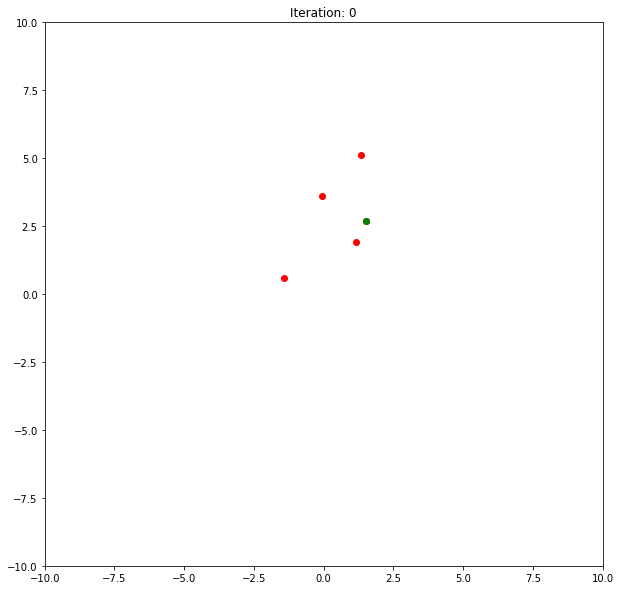

Best value: 2.366334370695851
Best position: Position(x=-1.4201442280876497, y=0.5912061756487197)


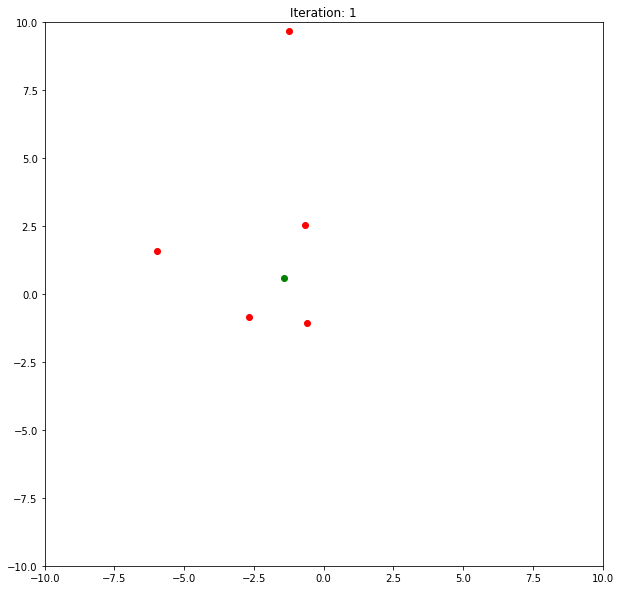

Best value: 1.509550154015141
Best position: Position(x=-0.6136225901784866, y=-1.0644329339313896)


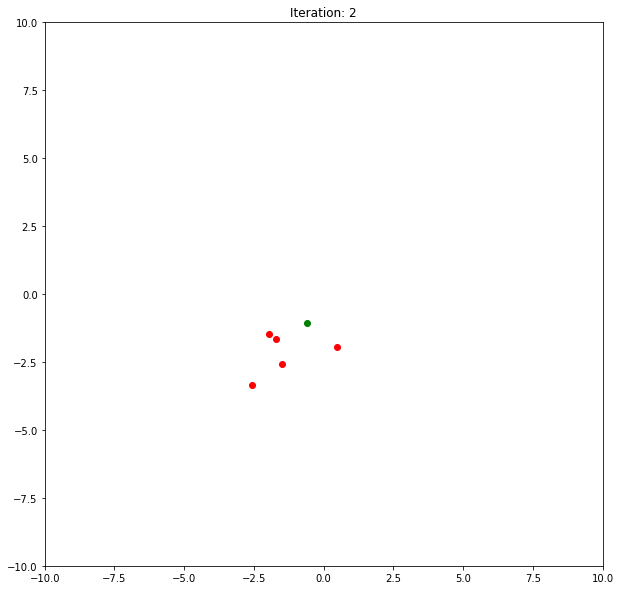

Best value: 1.509550154015141
Best position: Position(x=-0.6136225901784866, y=-1.0644329339313896)


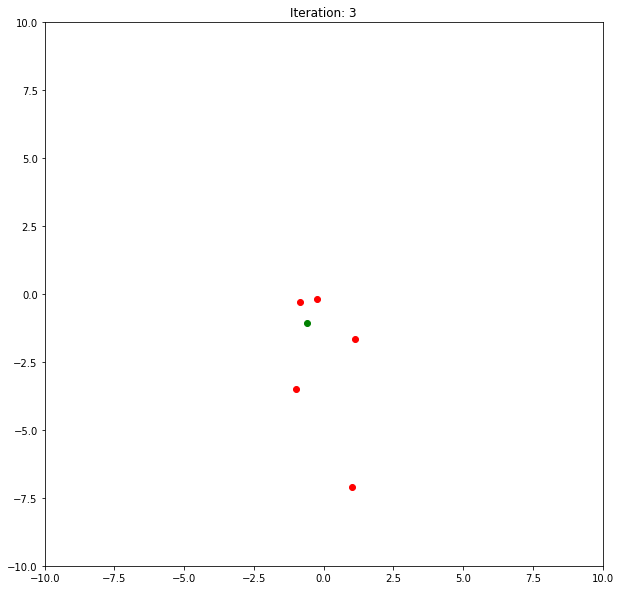

Best value: 0.08591844748604384
Best position: Position(x=-0.2368447673952978, y=-0.17269338042759808)


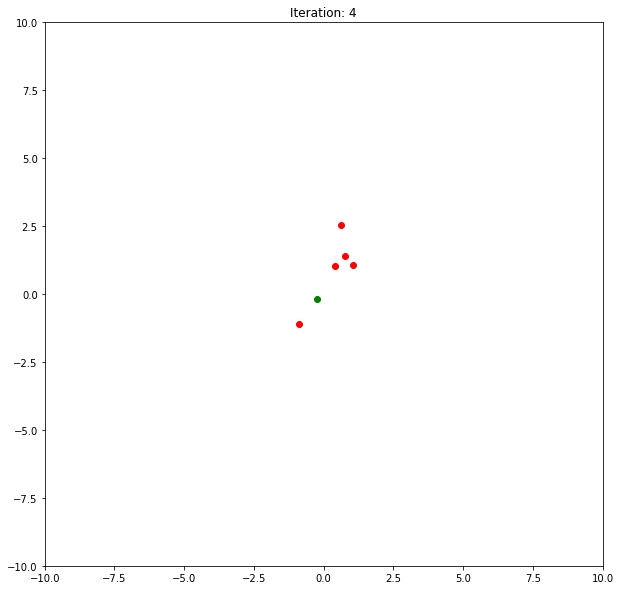

Best value: 0.08591844748604384
Best position: Position(x=-0.2368447673952978, y=-0.17269338042759808)


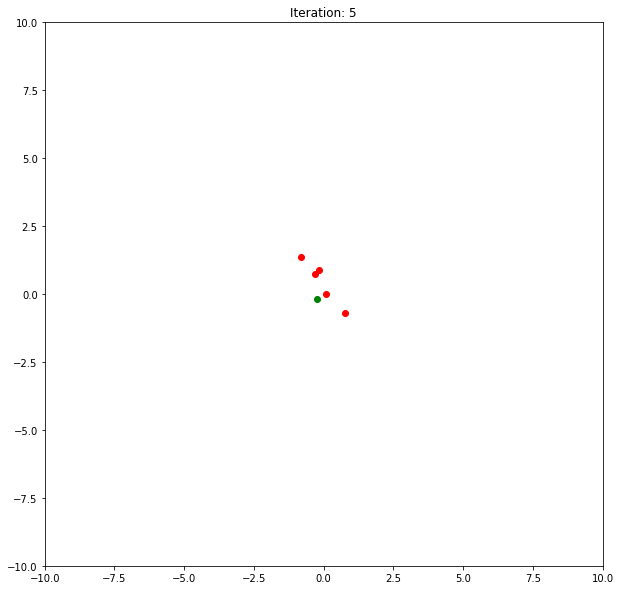

Best value: 0.010293747208907631
Best position: Position(x=0.10012784554790755, y=-0.016375645173305475)


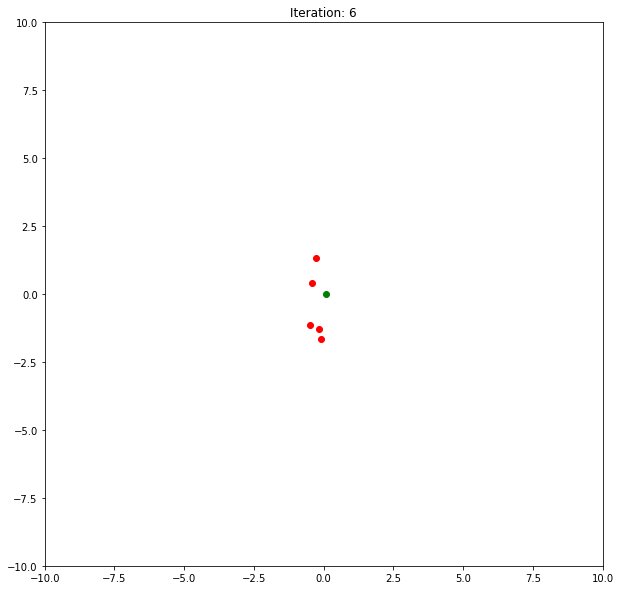

Best value: 0.010293747208907631
Best position: Position(x=0.10012784554790755, y=-0.016375645173305475)


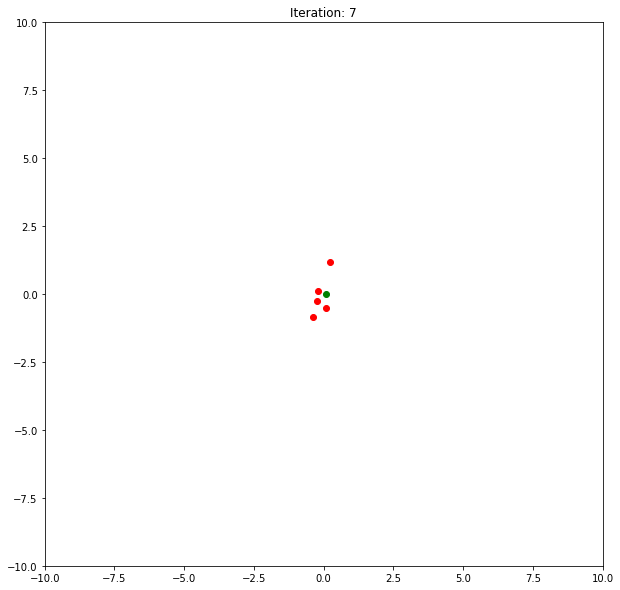

Best value: 0.010293747208907631
Best position: Position(x=0.10012784554790755, y=-0.016375645173305475)


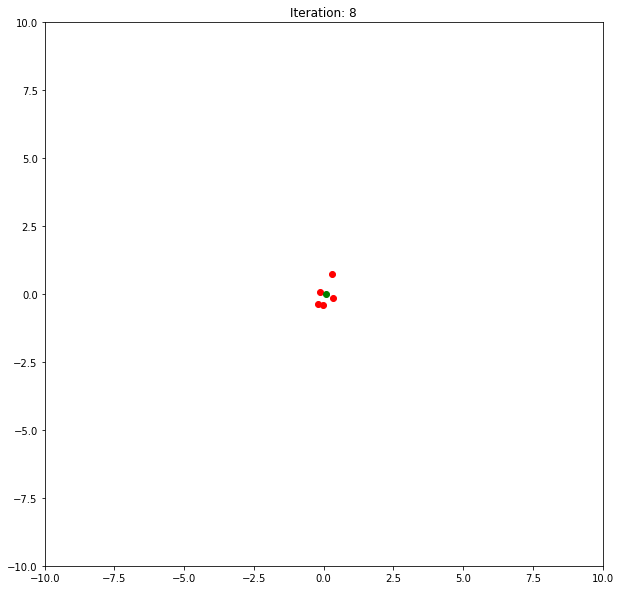

Best value: 0.010293747208907631
Best position: Position(x=0.10012784554790755, y=-0.016375645173305475)


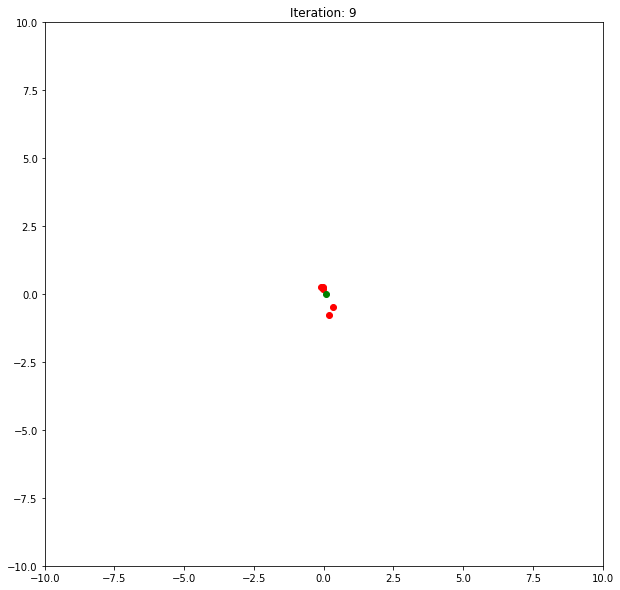

Best value: 0.010293747208907631
Best position: Position(x=0.10012784554790755, y=-0.016375645173305475)


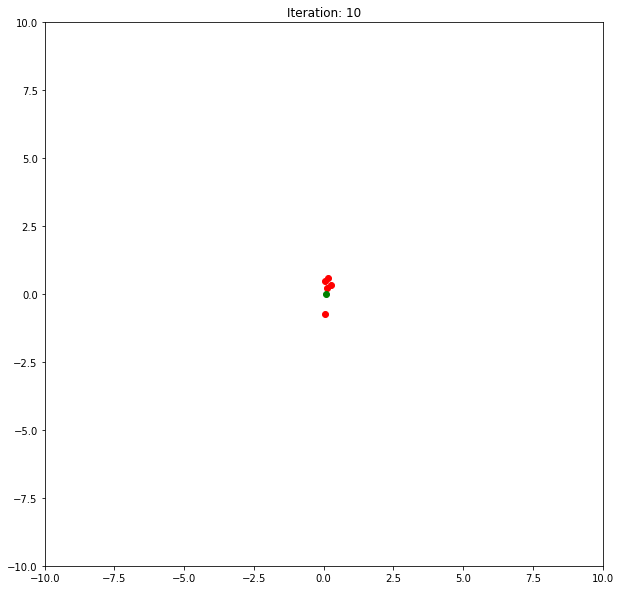

Best value: 0.010293747208907631
Best position: Position(x=0.10012784554790755, y=-0.016375645173305475)


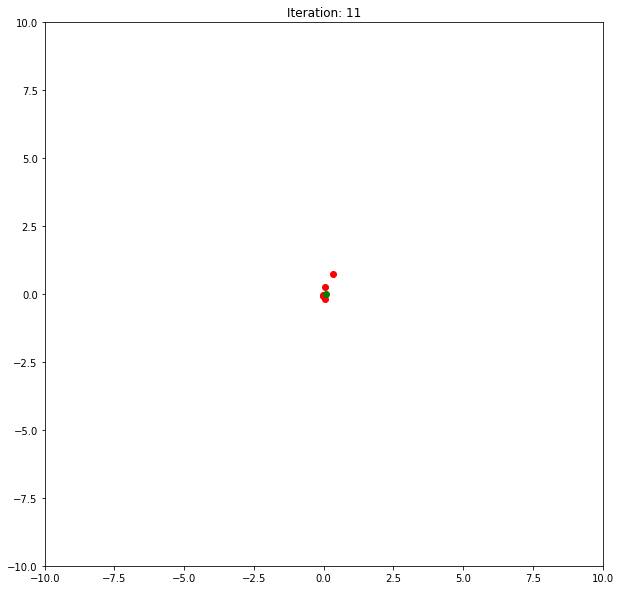

Best value: 0.002778870285830195
Best position: Position(x=-0.028511872091946694, y=-0.04433896069646498)


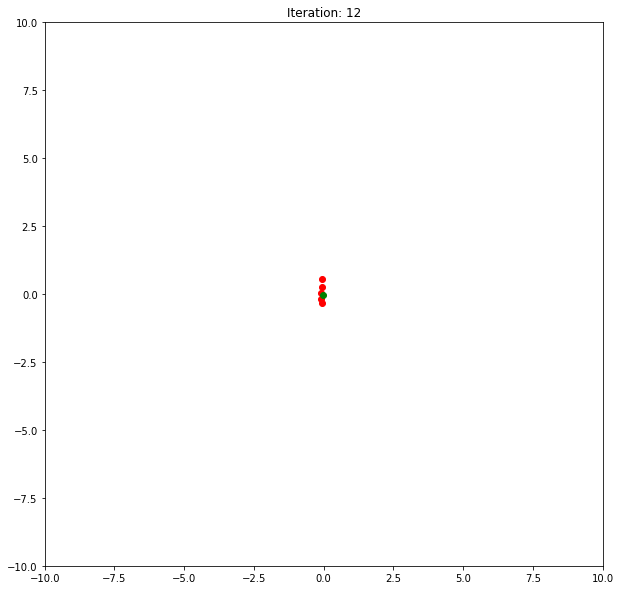

Best value: 0.002778870285830195
Best position: Position(x=-0.028511872091946694, y=-0.04433896069646498)


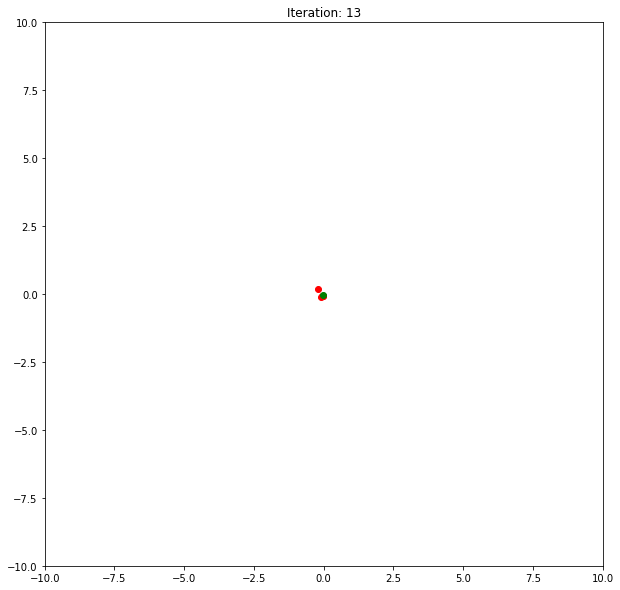

Best value: 0.002778870285830195
Best position: Position(x=-0.028511872091946694, y=-0.04433896069646498)


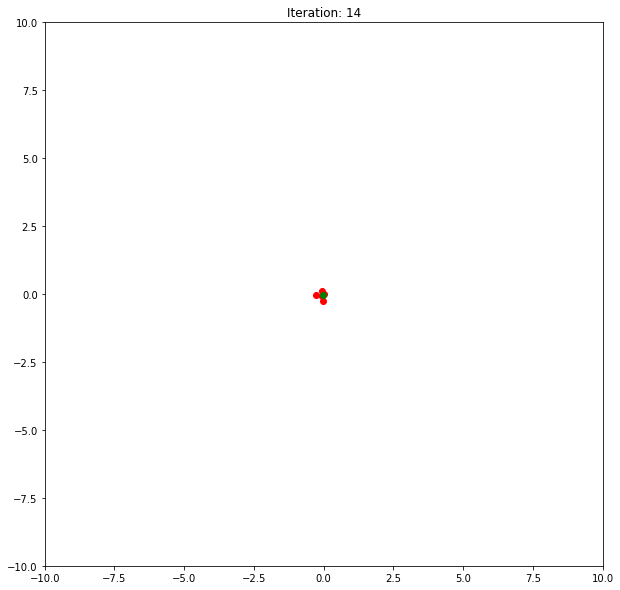

Best value: 0.00016153252093475506
Best position: Position(x=0.00998190178342312, y=0.007867284011706291)


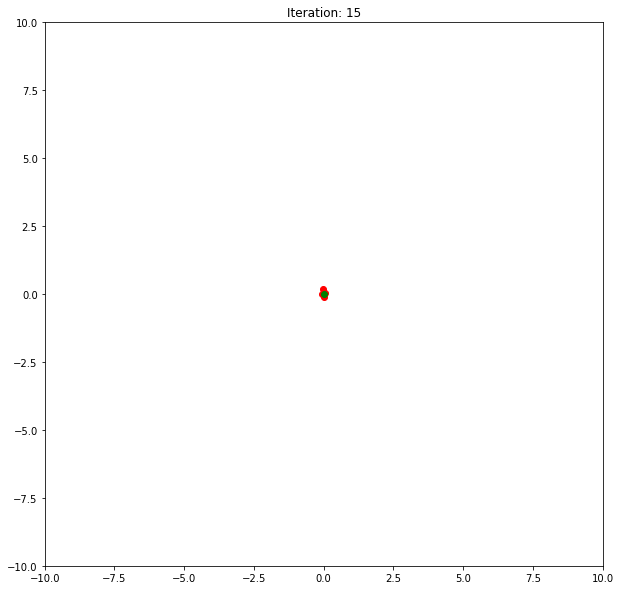

Best value: 0.00016153252093475506
Best position: Position(x=0.00998190178342312, y=0.007867284011706291)


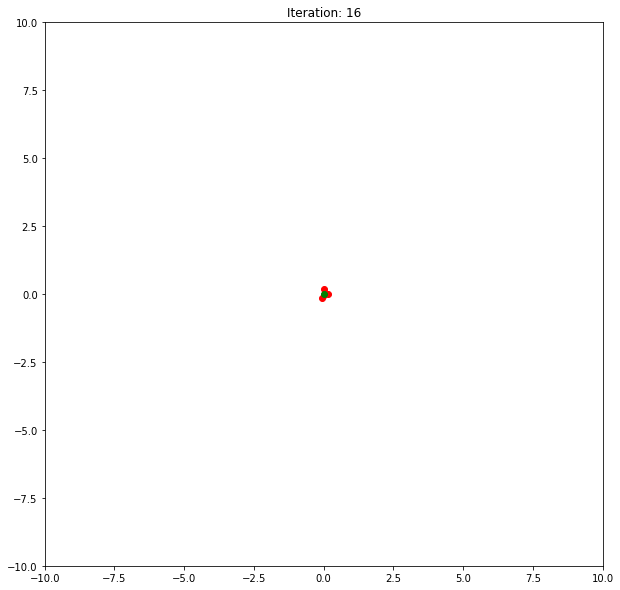

Best value: 0.00016153252093475506
Best position: Position(x=0.00998190178342312, y=0.007867284011706291)


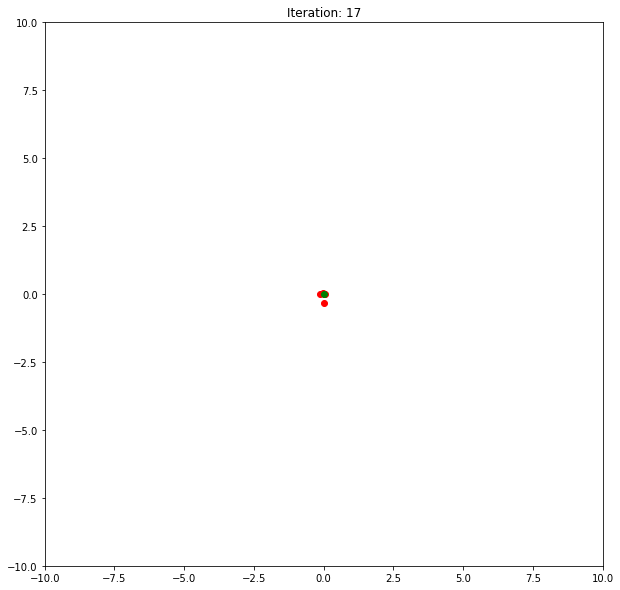

Best value: 0.00013154308798480106
Best position: Position(x=-0.0003195927575864177, y=-0.01146476988230027)


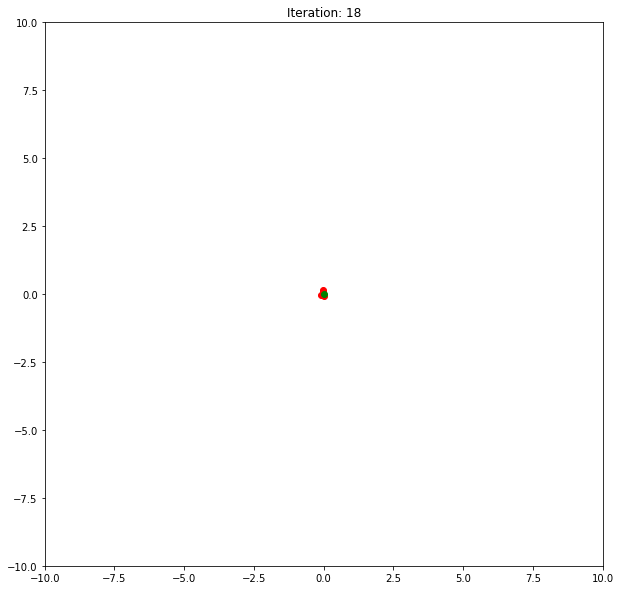

Best value: 0.00011358015806856293
Best position: Position(x=-0.010588714927362686, y=-0.0012080042448640495)


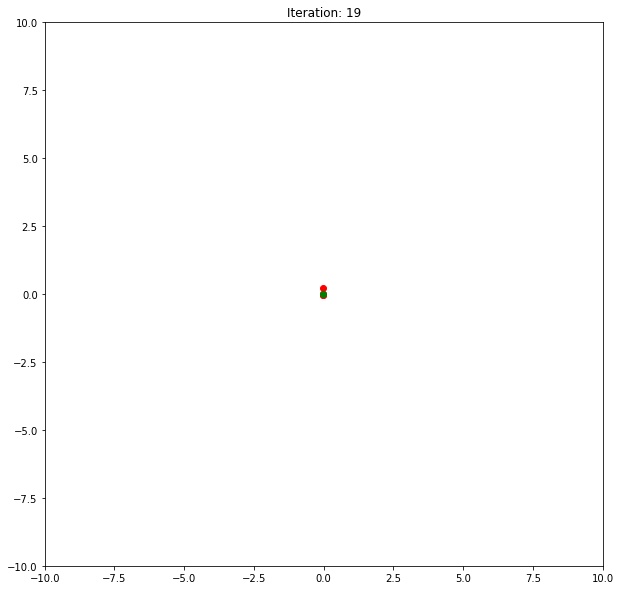

Best value: 0.00011358015806856293
Best position: Position(x=-0.010588714927362686, y=-0.0012080042448640495)


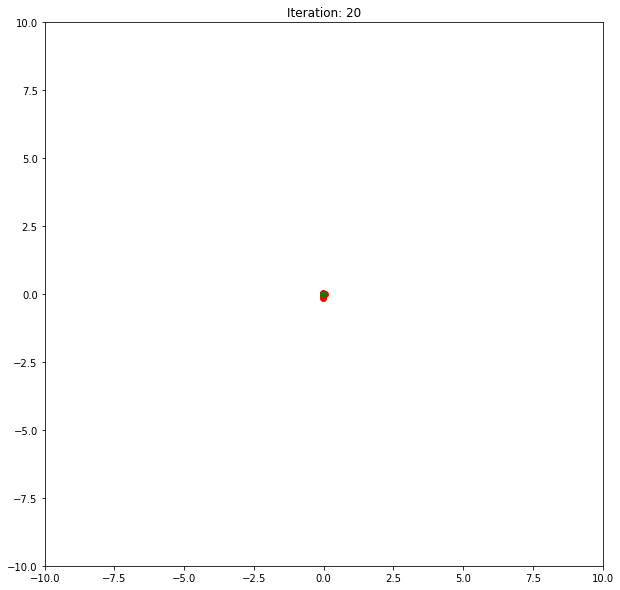

Best value: 7.371665430819203e-05
Best position: Position(x=-0.008482155719375047, y=0.001330296455856818)


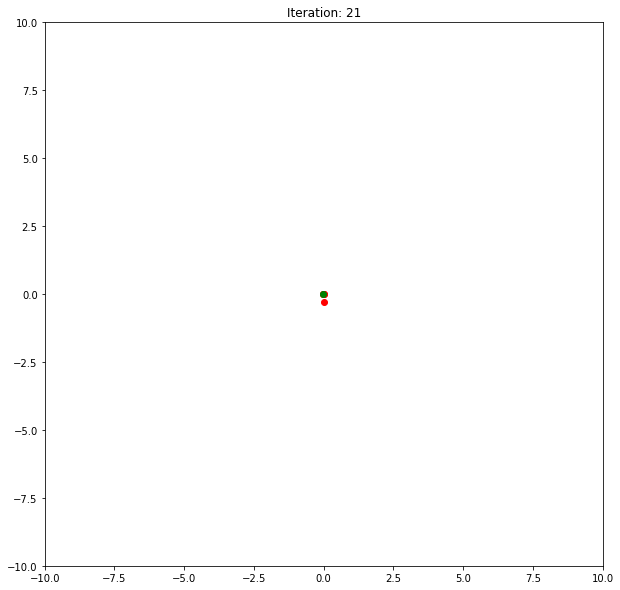

In [5]:
search_space = Swarm(n=5, w=0.5, c1=1.5, c2=1.5, target=1, error_threshold=0.000_1)
search_space.run(iterations=25)